#### Garima Thakur

GRIP : The Sparks Foundation

Task 2: Prediction using unsupervised ML

In this problem we will predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [2]:
iris= load_iris()

In [3]:
iris.keys()
#using key() you can see what data is available

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

## The feature of each sample flower stored in the data attribute of the dataset

In [4]:
print(iris.data.shape) 
print(iris.target.shape)

(150, 4)
(150,)


In [5]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
df['flower'] = iris.target
df['species'] = df['flower'].map({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]})
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
df["species"].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [8]:
## np.bincount(iris.target)  # shows that there are 50 flowers from each species

df['flower'].value_counts()

2    50
1    50
0    50
Name: flower, dtype: int64

In [9]:
iris['data'].shape

(150, 4)

In [10]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   flower             150 non-null    int32  
 5   species            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

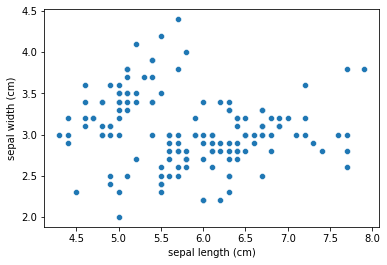

In [12]:
sns.scatterplot(data = df, x = "sepal length (cm)", y="sepal width (cm)")

In [13]:
# sns.scatterplot(data =df, x = "sepal length (cm)", y="sepal width (cm)", hue= "species")

c:\users\garim\anaconda3\envs\tsf_new\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


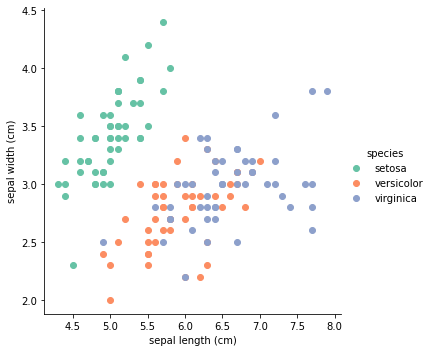

In [14]:
sns.FacetGrid(df, hue="species", palette="Set2", size=5) \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()

<AxesSubplot:xlabel='species', ylabel='sepal width (cm)'>

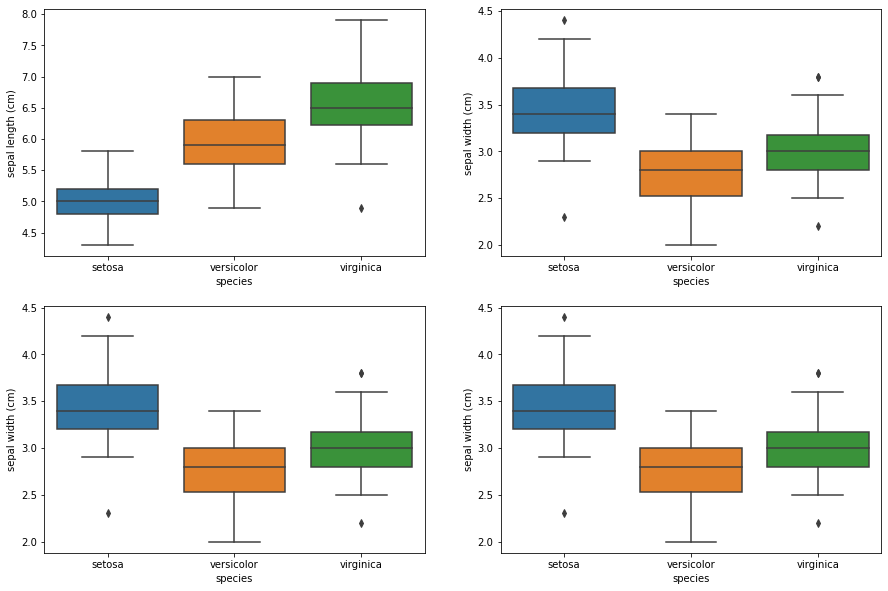

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x="species", y="sepal length (cm)", data=df)
plt.subplot(2,2,2)
sns.boxplot(x="species", y="sepal width (cm)", data=df)
plt.subplot(2,2,3)
sns.boxplot(x="species", y="sepal width (cm)", data=df)
plt.subplot(2,2,4)
sns.boxplot(x="species", y="sepal width (cm)", data=df)


## Data Visualization

In [16]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
flower               0
species              0
dtype: int64

In [17]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
flower,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

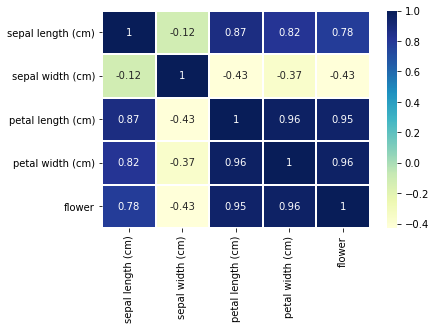

In [18]:
sns.heatmap(df.corr(), cmap ="YlGnBu", linecolor='white', linewidths=1, annot = True )

c:\users\garim\anaconda3\envs\tsf_new\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


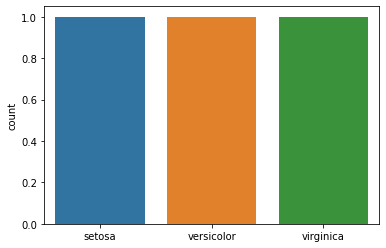

In [19]:
sns.countplot('target_names', data = iris)
plt.show()

In [20]:
df.shape

(150, 6)

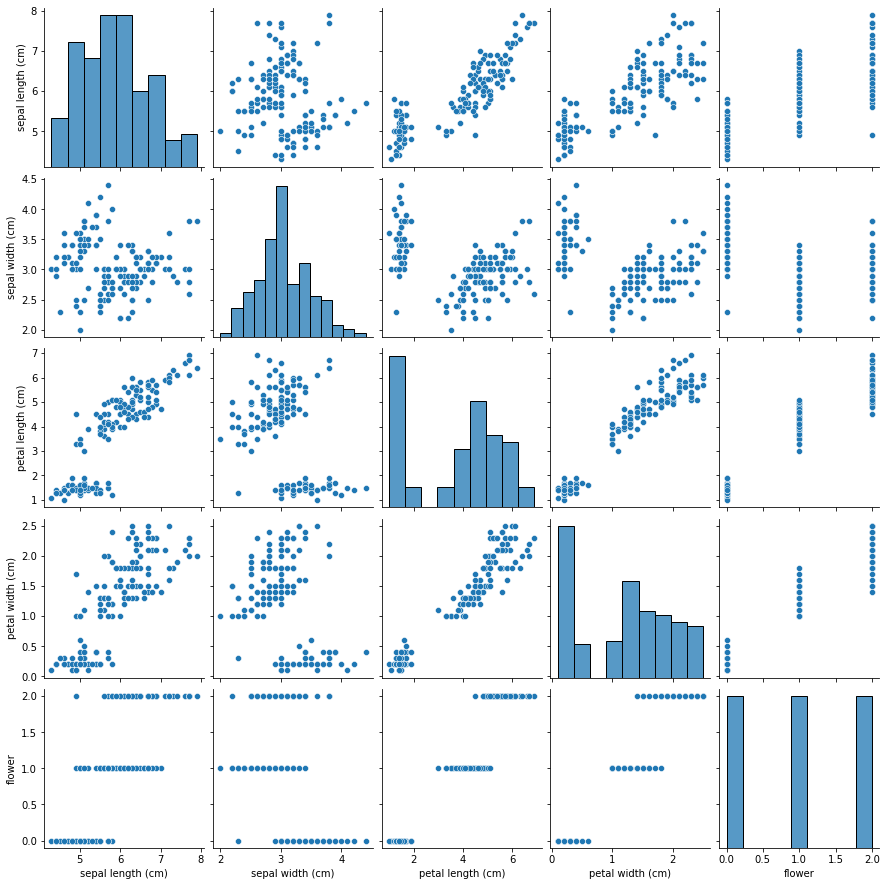

In [21]:
sns.pairplot(df, kind = "scatter")


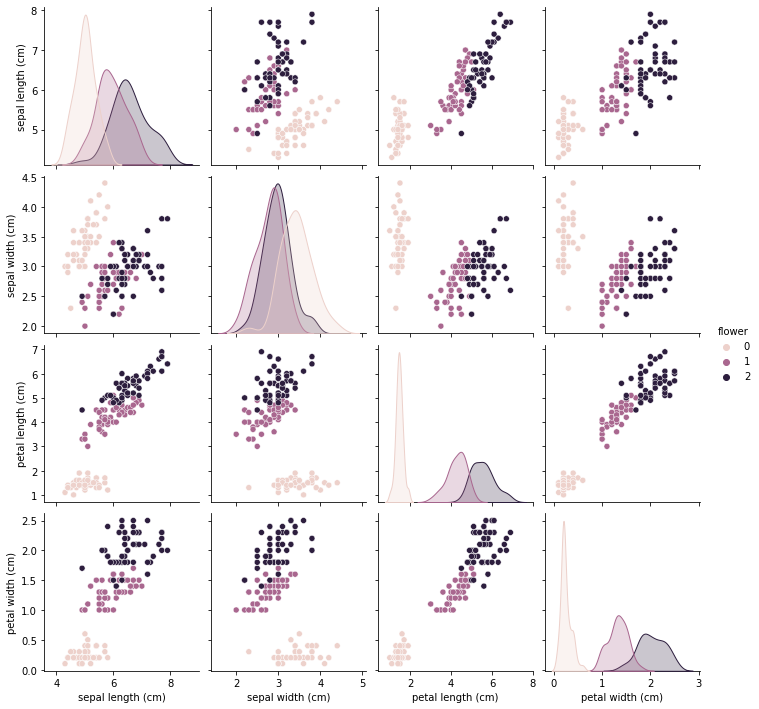

In [22]:
sns.pairplot(df, hue= "flower")

In [23]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower', 'species'], axis = 'columns', inplace = True)
df.head(3)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


Use K means to get required number of clusters

In [24]:
km =KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [25]:
y_pred = km.fit_predict(df)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
df['cluster'] = y_pred
df.head(2)

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0


In [27]:
df.cluster.unique()

array([0, 2, 1])

In [28]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster ==1]
df3 = df[df.cluster == 2]

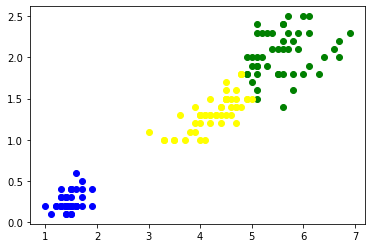

In [29]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')


#### Check the cluster centers

In [30]:
km.cluster_centers_   # gives (x,y) coordinates of the cluster

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

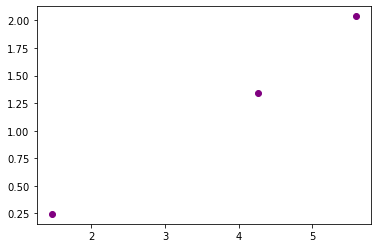

In [31]:
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color ="purple")

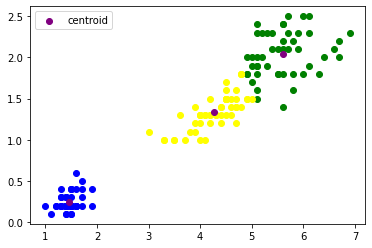

In [32]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color ="purple", label = "centroid")
plt.legend()

#### Elbow method tell you the exact number of clusters required 

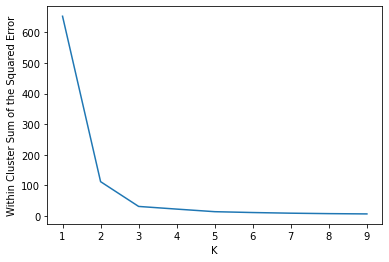

In [34]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters= k)
    km.fit(df)
    sse.append(km.inertia_)
plt.xlabel("K")
plt.ylabel('Within Cluster Sum of the Squared Error')
plt.plot(k_range, sse)

From the above garph, the elbow (graph between WCSS(Within Cluster Sum of Square) and k) occurs at k = 3, as at k = 3 we have an abrupt decrease of WCSS and so we chose k = 3 (i.e the optimum value of clusters)  

Conclusion:
  
The optimum nsS
umber of clusters has been chosen and value of k has been determined.  

Thank you!